# OLS - Ordinary Least Square
## Implementing of Simple linear regression model using scikit-learn

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')

In [3]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
pd.set_option("display.max_rows", 10)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
X = df['RM'].values
X = X.reshape(-1, 1)
y = df['MEDV'].values
y = y.reshape(-1, 1)

In [5]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
import matplotlib.pyplot as plt

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

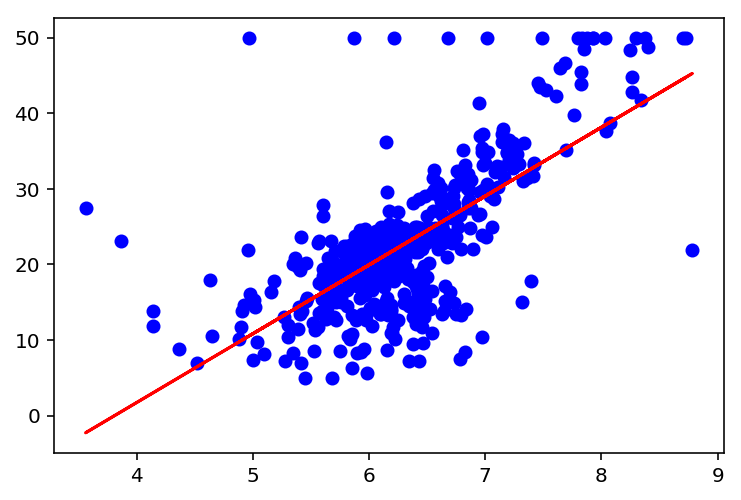

In [7]:
lin_regplot(X, y, slr)
plt.show()

In [8]:
print('Slop: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slop: 9.102
Intercept: -34.671


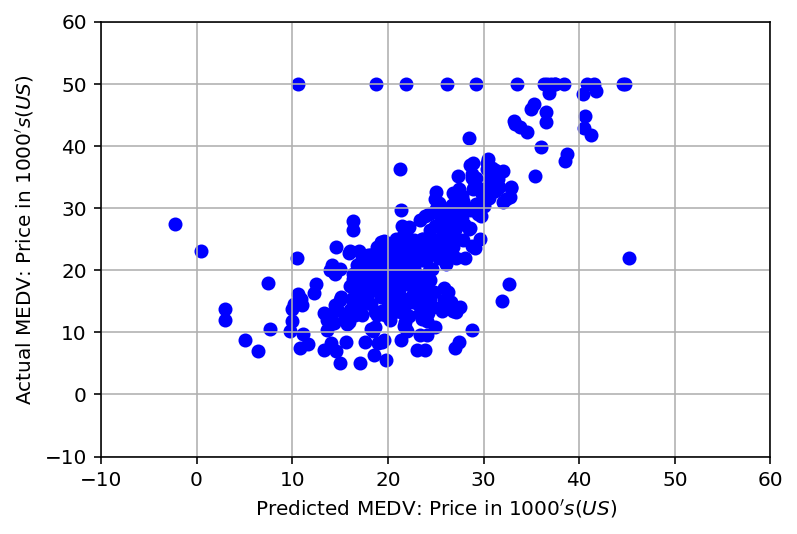

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(slr.predict(X), y, c='blue')
plt.xlabel('Predicted MEDV: Price in $1000\'s (US$)')
plt.ylabel('Actual MEDV: Price in $1000\'s (US$)')
plt.xlim(-10, 60)
plt.ylim(-10, 60)
plt.grid()
plt.show()

## RANSAC - Random Sampling Consensus Algorithm using scikit-learn

In [17]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        residual_metric=lambda x: np.sum(np.abs(x), axis=1),
                        residual_threshold=5.0,
                        random_state=0)
ransac.fit(X,y)

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x10b4b31e0>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

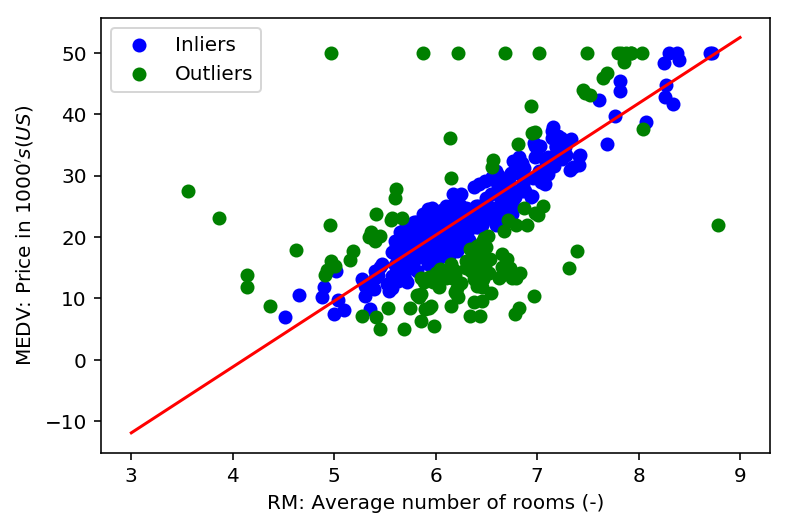

In [22]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask],
           c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
           c='green', marker='o', label='Outliers')

plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('RM: Average number of rooms (-)')
plt.ylabel('MEDV: Price in $1000\'s (US$)')
plt.legend(loc='upper left')
plt.show()

In [28]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


## Implementing of Multiple (two variables) linear regression model using scikit-learn

In [56]:
from sklearn.preprocessing import StandardScaler
from LinearRegressionGD import LinearRegressionGD
Z = np.zeros((2, len(df['RM'])))
Z[0]=df['RM']
Z[1]=df['LSTAT']
Z = Z.T

In [57]:
slr.fit(Z, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
print(slr.coef_)
print(slr.intercept_)

[ 5.09478798 -0.64235833]
-1.35827281187


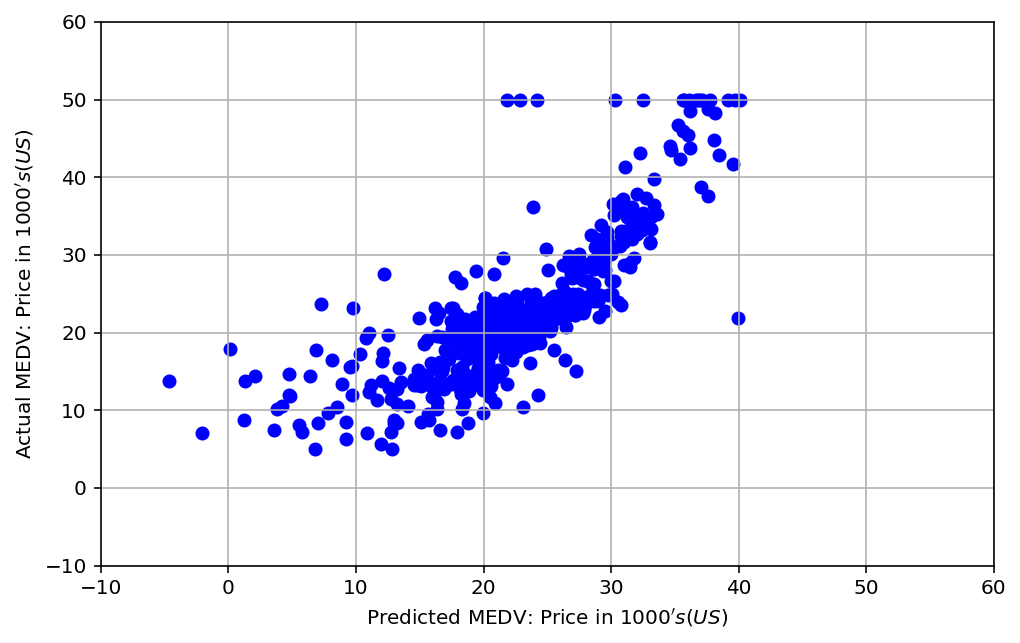

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 5))
plt.scatter(slr.predict(Z), y, c='blue')
plt.xlabel('Predicted MEDV: Price in $1000\'s (US$)')
plt.ylabel('Actual MEDV: Price in $1000\'s (US$)')
plt.xlim(-10, 60)
plt.ylim(-10, 60)
plt.grid()
plt.show()

## Implementing of Multiple ( more than three) linear regression model using scikit-learn

In [30]:
from sklearn.cross_validation import train_test_split

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
df.iloc[:,:-1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [61]:
# Prepare Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values # same as df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
# Training the model
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

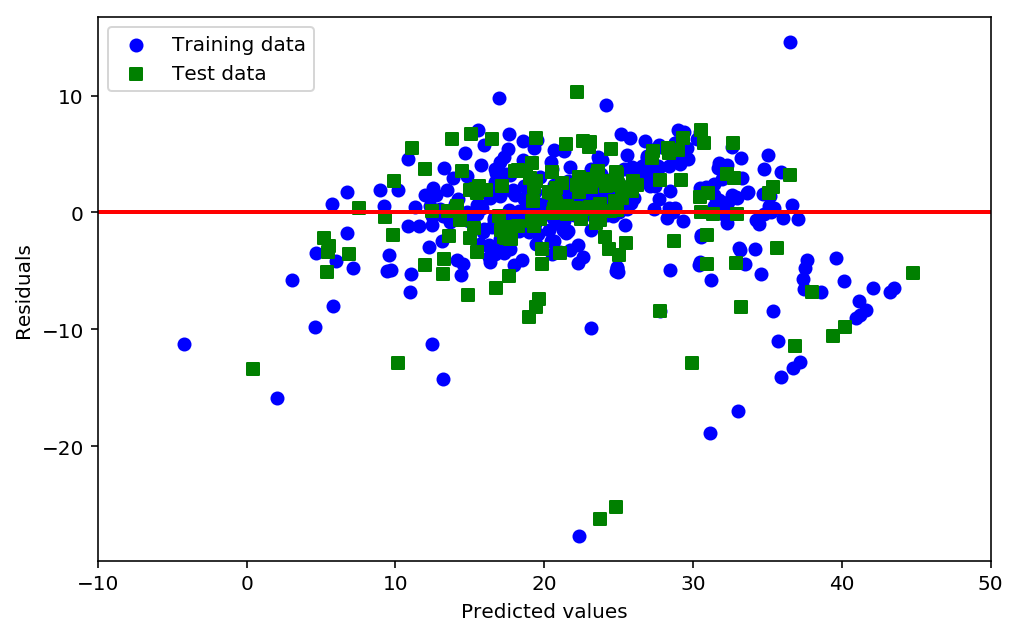

In [63]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

fig = plt.figure(figsize=(8, 5))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()